In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset
ipl_data = pd.read_csv('ipl.csv')

In [2]:
ipl_data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
ipl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


# Data Preprocessing

In [4]:
# Check the shape of the data
rows = ipl_data.shape[0]
columns = ipl_data.shape[1]

print("The number of rows in the data is %d"%(rows))
print("The number of columns in the data is %d"%(columns))

The number of rows in the data is 76014
The number of columns in the data is 15


In [5]:
# Check for Null Values
ipl_data.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [6]:
ipl_data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [7]:
# Drop the unecessary columns like mid, striker and non striker
columns_to_drop = ['striker', 'non-striker', 'mid', 'batsman', 'bowler']
ipl_data.drop(columns_to_drop, axis = 1, inplace = True)

In [8]:
ipl_data.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [9]:
# Print all the teams
ipl_data['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [10]:
# We don't want the teams which are not playing rn
current_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Sunrisers Hyderabad']

# Use the rows which have current_teams
ipl_data = ipl_data[ipl_data['bat_team'].isin(current_teams) & ipl_data['bowl_team'].isin(current_teams)]

In [11]:
ipl_data.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [12]:
ipl_data['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'MA Chidambaram Stadium, Chepauk', 'Eden Gardens',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera',
       'Himachal Pradesh Cricket Association Stadium',
       'Subrata Roy Sahara Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'Barabati Stadium', 'Maharashtra Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Punjab Cricket Association IS Bi

In [13]:
#to see most used stadiums
ipl_data['count'] = 1
ipl_data.groupby(['venue']).count()['count']

venue
Barabati Stadium                                         372
Brabourne Stadium                                       1256
Buffalo Park                                             256
De Beers Diamond Oval                                    122
Dr DY Patil Sports Academy                               602
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium      617
Dubai International Cricket Stadium                      868
Eden Gardens                                            6066
Feroz Shah Kotla                                        5698
Himachal Pradesh Cricket Association Stadium             867
Holkar Cricket Stadium                                   250
JSCA International Stadium Complex                       716
Kingsmead                                               1353
M Chinnaswamy Stadium                                   5945
MA Chidambaram Stadium, Chepauk                         4982
Maharashtra Cricket Association Stadium                  502
New Wanderers Stad

In [14]:
ipl_data.drop(labels=['count'], axis=1, inplace=True)

In [15]:
current_venues = ['M Chinnaswamy Stadium','Eden Gardens', 'Feroz Shah Kotla', 'MA Chidambaram Stadium, Chepauk',
       'Punjab Cricket Association Stadium, Mohali', 
       'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal']

In [16]:
ipl_data = ipl_data[(ipl_data['venue'].isin(current_venues))]

In [17]:
# Removing the first 5 overs data in every match
ipl_data = ipl_data[ipl_data['overs']>=5.0]

In [18]:
ipl_data.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


<AxesSubplot:>

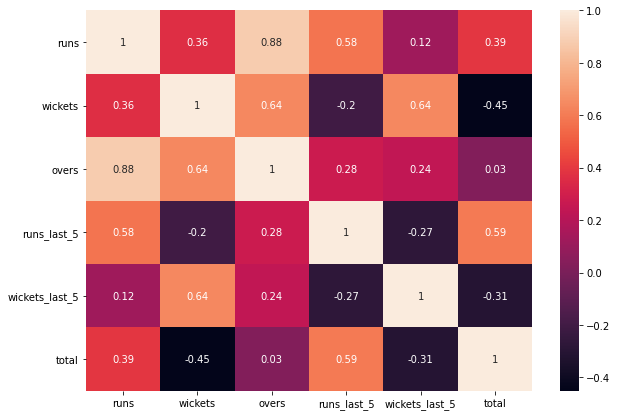

In [19]:
# Check the correlation betweeen the numerical features
corr = ipl_data.corr()
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))


# Plot the heatmaps using seaborn
import seaborn as sns
sns.heatmap(corr, annot=True)

**There ismulticolinearity here**

In [20]:
# encode the categorical columns using pd.get_dummies
nominal_cols = ['bat_team', 'bowl_team', 'venue'] # one hot encode these columns

# Let's check the number of unique values in cat_cols
for cols in nominal_cols:
    n_unique = np.unique(ipl_data[cols]).shape[0]
    print("Number of unique values in %s column is %d"%(cols, n_unique))

Number of unique values in bat_team column is 8
Number of unique values in bowl_team column is 8
Number of unique values in venue column is 8


In [21]:
# One hot encode the columns and concat using pd.concat
ipl_data = pd.concat((ipl_data, pd.get_dummies(ipl_data[nominal_cols])), axis = 1)

In [22]:
ipl_data.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,...,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,venue_Eden Gardens,venue_Feroz Shah Kotla,venue_M Chinnaswamy Stadium,"venue_MA Chidambaram Stadium, Chepauk","venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal",venue_Sawai Mansingh Stadium,venue_Wankhede Stadium
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222,...,1,0,0,0,1,0,0,0,0,0
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222,...,1,0,0,0,1,0,0,0,0,0
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222,...,1,0,0,0,1,0,0,0,0,0
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222,...,1,0,0,0,1,0,0,0,0,0
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222,...,1,0,0,0,1,0,0,0,0,0


In [23]:
# Since, the nominal columns have been encoded now we don't have any use for those so, drop these columns
ipl_data.drop(nominal_cols, axis = 1, inplace = True)

In [24]:
# Convert 
ipl_data['date'] = pd.to_datetime(ipl_data['date'])

In [25]:
ipl_data['date'].dt.year

32       2008
33       2008
34       2008
35       2008
36       2008
         ... 
75884    2017
75885    2017
75886    2017
75887    2017
75888    2017
Name: date, Length: 28608, dtype: int64

In [26]:
ipl_data.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'venue_Eden Gardens',
       'venue_Feroz Shah Kotla', 'venue_M Chinnaswamy Stadium',
       'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Sawai Mansingh Stadium', 'venue_Wankhede Stadium'],
      dtype='object')

In [27]:
#rearranging the columns
ipl_data = ipl_data[['date','bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'venue_Eden Gardens',
       'venue_Feroz Shah Kotla','venue_M Chinnaswamy Stadium',
       'venue_MA Chidambaram Stadium, Chepauk','venue_Sawai Mansingh Stadium',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Wankhede Stadium', 'overs','runs', 'wickets', 'runs_last_5', 'wickets_last_5',
       'total']]

In [28]:
# Split the data into training and testing set
train_set = ipl_data[ipl_data['date'].dt.year <= 2016]
test_set = ipl_data[ipl_data['date'].dt.year >= 2017]

print('Shape of training set is %d, %d'%(train_set.shape[0], train_set.shape[1]))
print('Shape of testing set is %d, %d'%(test_set.shape[0], test_set.shape[1]))

Shape of training set is 26283, 31
Shape of testing set is 2325, 31


In [29]:
# Drop the date columns
train_set.drop(['date'], axis = 1, inplace = True)
test_set.drop(['date'], axis = 1, inplace = True)

In [30]:
test_set.head()

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,venue_Sawai Mansingh Stadium,"venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal",venue_Wankhede Stadium,overs,runs,wickets,runs_last_5,wickets_last_5,total
68894,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,5.1,46,1,42,1,207
68895,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,5.2,50,1,46,1,207
68896,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,5.3,50,1,44,1,207
68897,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,5.4,54,1,48,1,207
68898,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,5.5,58,1,51,1,207


In [31]:
# Split the training and testing set into X and y
X_train, y_train = train_set.drop('total', axis = 1), train_set['total']
X_test, y_test = test_set.drop('total', axis = 1), test_set['total']

# Machine Learning Modelling

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

# Compute the metrics and return the results
def Compute_Metrics(y_true, y_pred):

    #1. MAE
    mae = mean_absolute_error(y_true, y_pred)
    #2. MSE
    mse = mean_squared_error(y_true, y_pred)
    #3. RMSE
    rmse = np.sqrt(mean_squared_error(y_true,y_pred))

    try:
    #5. MSLE
      msle = mean_squared_log_error(y_true, y_pred)
      metrics_dict = {'MAE' : [mae], 'MSE' : [mse], 'RMSE' : [rmse], 'MSLE' : [msle]}
    except:
      metrics_dict = {'MAE' : [mae], 'MSE' : [mse], 'RMSE' : [rmse], 'MSLE' : [0]}

    # Create a DataFrame and storing all the metrics
    metrics_df = pd.DataFrame(data=metrics_dict) # Creating the DataFrame
    
    return  metrics_df# formatting the DataFrame to return results only upto 4 decimal places

#### 1. Decision Tree Regressor

In [33]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
# Train Model
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [34]:
# Evaluate Model
train_score_tree = str(tree.score(X_train, y_train) * 100)
test_score_tree = str(tree.score(X_test, y_test) * 100)
print(f'Train Score : {train_score_tree[:5]}%\nTest Score : {test_score_tree[:5]}%')


Train Score : 99.99%
Test Score : 22.91%


In [35]:
# Make predictions on the test set and compute all the metrics
decision_tree = tree.predict(X_test)

# Compute metrics
dtr_metrics = Compute_Metrics(y_test, decision_tree)

dtr_metrics

,MAE,MSE,RMSE,MSLE
0,17.979785,585.713978,24.201528,0.021123


#### Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
# Train Model
linreg.fit(X_train, y_train)

LinearRegression()

In [37]:
# Evaluate Model
train_score_linreg = str(linreg.score(X_train, y_train) * 100)
test_score_linreg = str(linreg.score(X_test, y_test) * 100)
print(f'Train Score : {train_score_linreg[:5]}%\nTest Score : {test_score_linreg[:5]}%')


Train Score : 66.54%
Test Score : 71.65%


In [38]:
# Make predictions on the test set and compute all the metrics
linear_reg = linreg.predict(X_test)

# Compute metrics
lr_metrics = Compute_Metrics(y_test, linear_reg)

lr_metrics

,MAE,MSE,RMSE,MSLE
0,11.253515,215.353163,14.674916,0.00793


#### Random Forest Regression

In [39]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
# Train Model
forest.fit(X_train, y_train)

RandomForestRegressor()

In [40]:
# Evaluate Model
train_score_forest = str(forest.score(X_train, y_train)*100)
test_score_forest = str(forest.score(X_test, y_test)*100)
print(f'Train Score : {train_score_forest[:5]}%\nTest Score : {test_score_forest[:5]}%')


Train Score : 99.59%
Test Score : 52.55%


In [41]:
# Make predictions on the test set and compute all the metrics
forest_reg = forest.predict(X_test)

# Compute metrics
rf_metrics = Compute_Metrics(y_test, forest_reg)

rf_metrics

,MAE,MSE,RMSE,MSLE
0,14.405843,360.494603,18.986695,0.012519


#### Lasso Regression

In [42]:
from sklearn.linear_model import LassoCV
lasso = LassoCV()
# Train Model
lasso.fit(X_train, y_train)

LassoCV()

In [43]:
# Evaluate Model
train_score_lasso = str(lasso.score(X_train, y_train)*100)
test_score_lasso = str(lasso.score(X_test, y_test)*100)
print(f'Train Score : {train_score_lasso[:5]}%\nTest Score : {test_score_lasso[:5]}%')


Train Score : 63.81%
Test Score : 73.10%


In [44]:
# Make predictions on the test set and compute all the metrics
lasso_reg = lasso.predict(X_test)

# Compute metrics
lasso_metrics = Compute_Metrics(y_test, lasso_reg)

lasso_metrics

,MAE,MSE,RMSE,MSLE
0,11.124442,204.33272,14.2945,0.007572


#### Support Vector Machine

In [45]:
from sklearn.svm import SVR
svm = SVR()
# Train Model
svm.fit(X_train, y_train)

SVR()

In [46]:
train_score_svm = str(svm.score(X_train, y_train)*100)
test_score_svm = str(svm.score(X_test, y_test)*100)
print(f'Train Score : {train_score_svm[:5]}%\nTest Score : {test_score_svm[:5]}%')


Train Score : 55.28%
Test Score : 59.70%


In [47]:
# Make predictions on the test set and compute all the metrics
svm_reg = svm.predict(X_test)

# Compute metrics
svm_metrics = Compute_Metrics(y_test, svm_reg)

svm_metrics

,MAE,MSE,RMSE,MSLE
0,13.88018,306.214869,17.498996,0.011302


#### Neural Networks

In [48]:
from sklearn.neural_network import MLPRegressor
neural_net = MLPRegressor(activation='logistic', max_iter=500)
# Train Model
neural_net.fit(X_train, y_train)

MLPRegressor(activation='logistic', max_iter=500)

In [49]:
train_score_neural_net = str(neural_net.score(X_train, y_train)*100)
test_score_neural_net = str(neural_net.score(X_test, y_test)*100)
print(f'Train Score : {train_score_neural_net[:5]}%\nTest Score : {test_score_neural_net[:5]}%')


Train Score : 94.93%
Test Score : 44.39%


In [50]:
# Make predictions on the test set and compute all the metrics
nu_net = neural_net.predict(X_test)

# Compute metrics
nn_metrics = Compute_Metrics(y_test, nu_net)

nn_metrics

,MAE,MSE,RMSE,MSLE
0,15.950614,422.522435,20.555351,0.014835


## Best Model Selection

In [51]:
# Create a list of all the model metric dfs
metrics_df = pd.concat([dtr_metrics, lr_metrics, rf_metrics, lasso_metrics, svm_metrics, nn_metrics])
metrics_df['Models'] = ['DTR', 'LR', 'RF', 'LASSO', 'SVM','NN']
metrics_df.set_index('Models', inplace=True)

In [52]:
transposed_metric_df = metrics_df.transpose() # Transpose the dataframe
transposed_metric_df

Models,DTR,LR,RF,LASSO,SVM,NN
MAE,17.979785,11.253515,14.405843,11.124442,13.880180,15.950614
MSE,585.713978,215.353163,360.494603,204.332720,306.214869,422.522435
RMSE,24.201528,14.674916,18.986695,14.294500,17.498996,20.555351
MSLE,0.021123,0.007930,0.012519,0.007572,0.011302,0.014835


In [53]:
metrics_df.style.format('{:.2f}') #Format the dataframe

,MAE,MSE,RMSE,MSLE
Models,,,,
DTR,17.98,585.71,24.20,0.02
LR,11.25,215.35,14.67,0.01
RF,14.41,360.49,18.99,0.01
LASSO,11.12,204.33,14.29,0.01
SVM,13.88,306.21,17.50,0.01
NN,15.95,422.52,20.56,0.01


In [54]:
metrics_df_ = metrics_df.drop('LR',axis=0)

In [59]:
# Plot the results on a grouped bar graph using plotly
from plotly import graph_objects as go

# Initialise the figure
fig = go.Figure(
            data=[
                  # 1. Plotting MAE
                  go.Bar(
                        name = 'MAE',
                        x=metrics_df_.index,
                        y=metrics_df_['MAE'],
                        offsetgroup=0
                  ),
                  # 2. Plotting MSE
                  go.Bar(
                        name = 'MSE',
                        x=metrics_df_.index,
                        y=metrics_df_['MSE'],
                        offsetgroup=1
                  ),
                  # 3. Plotting RMSE
                  go.Bar(
                        name = 'RMSE',
                        x=metrics_df_.index,
                        y=metrics_df_['RMSE'],
                        offsetgroup=2
                  ),
                  # 4. Plotting MSLE
                  go.Bar(
                        name = 'MSLE',
                        x=metrics_df_.index,
                        y=metrics_df_['MSLE'],
                        offsetgroup=3
                  )
            ],
            # Updating the layout
            layout=go.Layout(
                title='Metric Comparison of Various Models'
            )
)
fig.show()

From above, we can see that **Lasso Regression** performed the best, closely followed by **Neural networks** and **Support vector machine**. So we will be choosing Random Forest for the final model

In [56]:
# Creating a pickle file for the classifier
import pickle
filename = 'Batting-score-LassoReg-model.pkl'
pickle.dump(lasso, open(filename, 'wb'))